In [1]:
from keras.datasets import mnist

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
X_train, X_test = X_train.reshape((len(X_train), -1)), X_test.reshape((len(X_test), -1))

In [6]:
from keras.utils import to_categorical
import numpy as np

In [7]:
y = to_categorical(np.hstack([y_train, y_test]))
y_train_cat, y_test_cat = y[:60_000], y[60_000:]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_cat, test_size=0.1)

In [10]:
X_tr.shape, y_tr.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((54000, 784), (54000, 10), (6000, 784), (6000, 10), (10000, 784), (10000,))

---

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def show(D, i):
    plt.imshow(D[i].reshape((28, 28)), cmap='gray'); plt.axis('off');

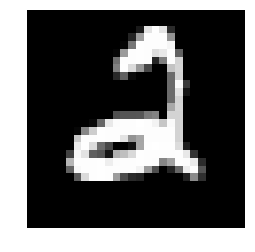

In [13]:
show(X_tr, 5)

---

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Overfit:

In [20]:
model = Sequential([
    Dense(500, activation='relu', input_shape=(784,)),
    Dense(500, activation='relu',),
    Dense(10, activation='softmax'),
])

### Ok, lol:

In [15]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,)),
])

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

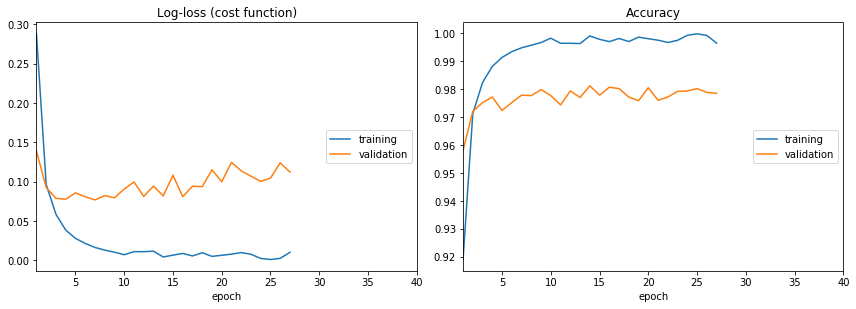

In [24]:
batch_size = 256
epochs = 40

model.fit(X_tr, y_tr, validation_data=(X_val, y_val),
          batch_size=batch_size, epochs=epochs, 
          callbacks=[EarlyStopping(patience=20), PlotLossesKeras()], verbose=0);

# Шпаргалки

<img src='images/learning_rates.png' width='50%'>

<img src='images/overfit_underfit.png' width='50%'>

Какими точно не должны быть на вид функции потерь:

https://lossfunctions.tumblr.com/